In [1]:
# importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score

# for visualisation
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from IPython.display import Image  
from subprocess import call

In [2]:
# importing the dataset 
titanic = pd.read_csv('titanic.csv')
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
titanic.shape

(891, 12)

## Data Cleaning

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Missing Values

In [5]:
missingvaluecount = titanic.isna().sum()
missingvaluecount

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Fill missing values in the 'Age' and 'Embarked' columns
titanic['Age'] = titanic['Age'].fillna((titanic['Age'].mean()))
titanic['Embarked'] = titanic['Embarked'].fillna("S")

In [7]:
titanic = titanic.dropna(subset = ["Age"])
titanic.shape

(891, 12)

### Transforming String to Numerical 

In [8]:
titanic.loc[titanic["Sex"] == "male", "Sex"] = 0
titanic.loc[titanic["Sex"] == "female", "Sex"] = 1
titanic["Sex"].unique()

array([0, 1], dtype=object)

In [9]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [10]:
titanic['Sex'] = titanic['Sex'].astype("int64")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 90.5+ KB


From previous analysis on the Titanic dataset, tbe most relevant variables in determining an passengers survival, are their Age, Gender and Class. 

To determines a passengers class both the passengers 'Pclass' and 'Fare' price will be used.

## Splitting Data into Training, Development & Test Sets

In [11]:
X = titanic.iloc[:,[2,4,5,9]].values
y = titanic.iloc[:,[1]].values

X = X.reshape(-1, 4)
y = y.reshape(-1, 1)

# setting random state for reproducability 
r = 4

# Training = 75%, Testing = 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=r)

# Training = 75%, Development = 15%, Testing = 10%
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.4, random_state=r)

print ("Training data:", X_train.shape, y_train.shape)
print ('Development data:', X_val.shape, y_val.shape)
print ("Test data:", X_test.shape, y_test.shape)

Training data: (668, 4) (668, 1)
Development data: (133, 4) (133, 1)
Test data: (90, 4) (90, 1)


## Training the DecisionTree Model on the Unpruned Data

In [12]:
# training a model without pruning
unpruned = DecisionTreeClassifier(max_depth=None, random_state=r)
unpruned.fit(X_train, y_train)

DecisionTreeClassifier(random_state=4)

## Unpruned Decision Tree @ Max_Depth = None

In [13]:
graphviz_installed = True

if (graphviz_installed):
  export_graphviz(unpruned, out_file='unpruned_tree_Titanic.dot', feature_names = ['Pclass','Sex', 'Age', 'Fare'],
                  rounded = True, proportion = False, precision = 2, filled = True)
  
  # Convert to png using system command
  call(['dot', '-Tpng', 'unpruned_tree_Titanic.dot', '-o', 'unpruned_tree_Titanic.png', '-Gdpi=200'])
  
else: 
  fig = plt.figure()
  tree.plot_tree(unpruned,feature_names = ['Pclass','Sex', 'Age', 'Fare'], 
                     rounded = True, proportion = False, precision = 2, filled = True) #display tree
  fig.savefig('unpruned_tree_Titanic.png')
  
Image(filename = 'unpruned_tree_Titanic.png', width=3000) #uncomment if using graphviz

In [14]:
print("Performance without pruning on the development set:", unpruned.score(X_val, y_val))
print("At depth:", unpruned.tree_.max_depth)

print("Performance without pruning on testing set:", unpruned.score(X_test, y_test))
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning on the development set: 0.8195488721804511
At depth: 18
Performance without pruning on testing set: 0.8222222222222222
At depth: 18


From the results we can see that the DecisionTree model can accurately determine whether a passenger surivied or not around 82% of the time using the development/validation set.

## Pruning @ MaxDepth 2 - 10

Pruned depth of: 2
Pruned depth of: 3
Pruned depth of: 4
Pruned depth of: 5
Pruned depth of: 6
Pruned depth of: 7
Pruned depth of: 8
Pruned depth of: 9
Pruned depth of: 10


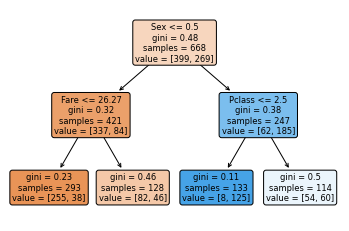

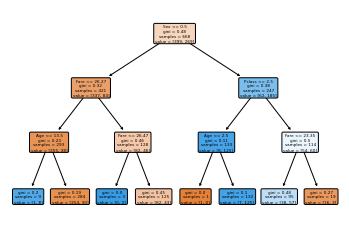

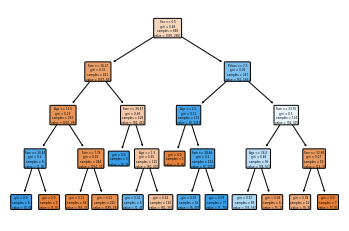

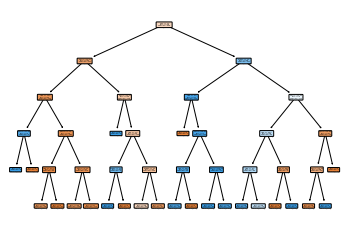

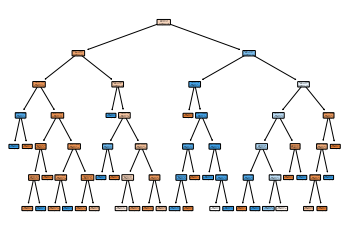

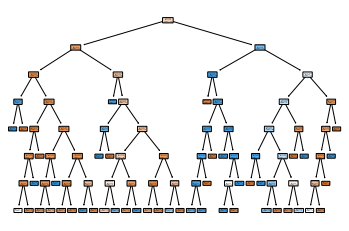

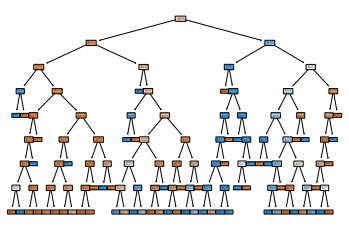

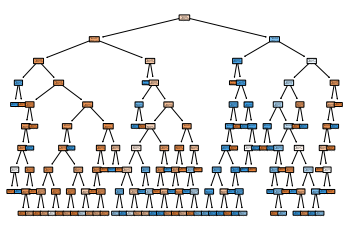

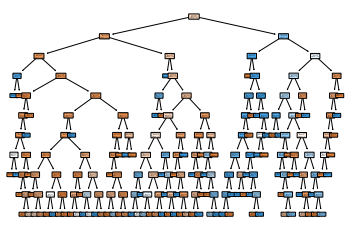

In [15]:
p_depth = range(2, 11)

accuracy_score_train = []
accuracy_score_dev = []
accuracy_score_test = []

for d in p_depth:
    print('Pruned depth of:', d)

    pruned = DecisionTreeClassifier(max_depth=d, random_state=r)
    pruned.fit(X_train, y_train)
    
    accuracy_score_train.append(pruned.score(X_train, y_train))
    accuracy_score_dev.append(pruned.score(X_val, y_val))
    accuracy_score_test.append(pruned.score(X_test, y_test))
    
    graphviz_installed = False

    if (graphviz_installed):
      export_graphviz(pruned, out_file='pruned_tree_Titanic.dot', feature_names = ['Pclass','Sex', 'Age', 'Fare'],
                      rounded = True, proportion = False, precision = 2, filled = True)
  
      # Convert to png using system command
      call(['dot', '-Tpng', 'pruned_tree_Titanic.dot', '-O', 'pruned_tree_Titanic.png', '-Gdpi=600'])
        
    else: 
      fig = plt.figure()
      tree.plot_tree(pruned,feature_names = ['Pclass','Sex', 'Age', 'Fare'], 
                         rounded = True, proportion = False, precision = 2, filled = True) #display tree
      fig.savefig('pruned_tree_Titanic.png')
  
    #Image(filename = 'pruned_tree_Titanic.png', width=400) #uncomment if using graphviz
    
    #print("Performance with pruning on testing set:", pruned.score(X_train, y_train))
    
    #print("Performance with pruning on the development set at depth:", pruned.score(X_val, y_val))

    #print("Performance with pruning on testing set:", pruned.score(X_test, y_test))

Text(0, 0.5, 'Accuracy Score')

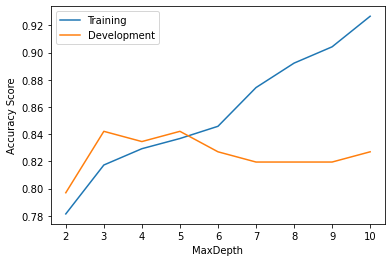

In [16]:
plt.plot(p_depth, accuracy_score_train, label="Training")
plt.plot(p_depth, accuracy_score_dev, label="Development")
#plt.plot(p_depth, accuracy_score_test, label="testing scores")
plt.legend()
plt.xlabel("MaxDepth")
plt.ylabel("Accuracy Score")

* **Training Set**
    * Slighlty curved graph, which tends to a maximum values of ~92% when the maxdepth is equal to 10. 
    * Between maxdepth 2 - 3, there is a rapid increase in accuracy from ~78% to ~82%.
    * As the maxdepth increases from 3 - 6 there is a slower increase in accuracy from ~82% - ~85%.
    * Between maxdepths of 6 - 10 there is an almost consistent linear increase in accuracy to ~92%.

* **Development Set**
    * Here we have a non-montonic relationship as the accuracy varies at each maxdepth values. 
    * Initially, there is a rapid increase in the model's accuracy to the maximum accuracy of ~84% as the maxdepth is increased from 2 to 3 which is the optimum maxdepth according to this model. 
    * This is then followed-by an decrease in accuracy from ~84% to ~83% as the maxdepth is increased to 4. 
    * This pattern of increasig/decreasing accuracy as the maxdepth is increased incremently by 1 keeps occuring between the maxdepths of 4 - 5. 
    * However the changes in accuracy decrease as the maxdepth is increased between 5 - 9, with the smallest changes in accuracy occuring in this maxdepth range.
    * Once the maxdepth increases from 9 to 10 there is an increase in accuracy from ~82% to ~82.5%.
    
* **Overview**
    * Intially, the development set was mirroring the training set in showing an increase in accuracy, but at an higher accuracy therefore the model was overfitting.
    * Once the optimal maxdepth was determined by the DecisionTree model, the model was consistenlty underfitting up to maxdepth of 5 in comparison to the training set. And significantly underfitting at maxdepths greater than 5. 
    * However, pruning the model has increased the development set accuracy from ~81% to ~84% whilst decreasing the tree's maxdepth complexitiy from 18 to 3.

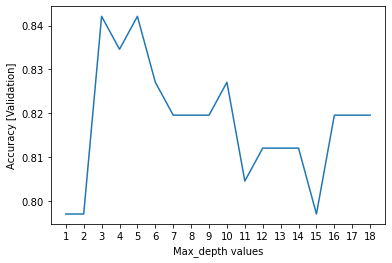

In [17]:
# looking at effect of pruning on the DEVELOPMENT/VALIDATION set
pruned_depths = range(1,unpruned.tree_.max_depth+1)
pruned_scores_val = [] 
for d in pruned_depths:
  clf_val = DecisionTreeClassifier(max_depth=d, random_state=r)
  clf_val.fit(X_train, y_train)
  score_val = clf_val.score(X_val, y_val)
  pruned_scores_val.append(score_val)

fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_scores_val) 
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy [Validation]")
ax.xaxis.set_ticks(pruned_depths)
plt.show()

In [18]:
# fitting the chosen tree based on the DEVELOPMENT/VALIDATION set
best_depth_val = pruned_depths[np.argmax(pruned_scores_val)]
print('Best performance reached at depth of:', best_depth_val, 'on the validation set.')

pruned_val = DecisionTreeClassifier(max_depth=best_depth_val)
pruned_val.fit(X_train, y_train)

Best performance reached at depth of: 3 on the validation set.


DecisionTreeClassifier(max_depth=3)

**Optimum Max_Depth:** 3

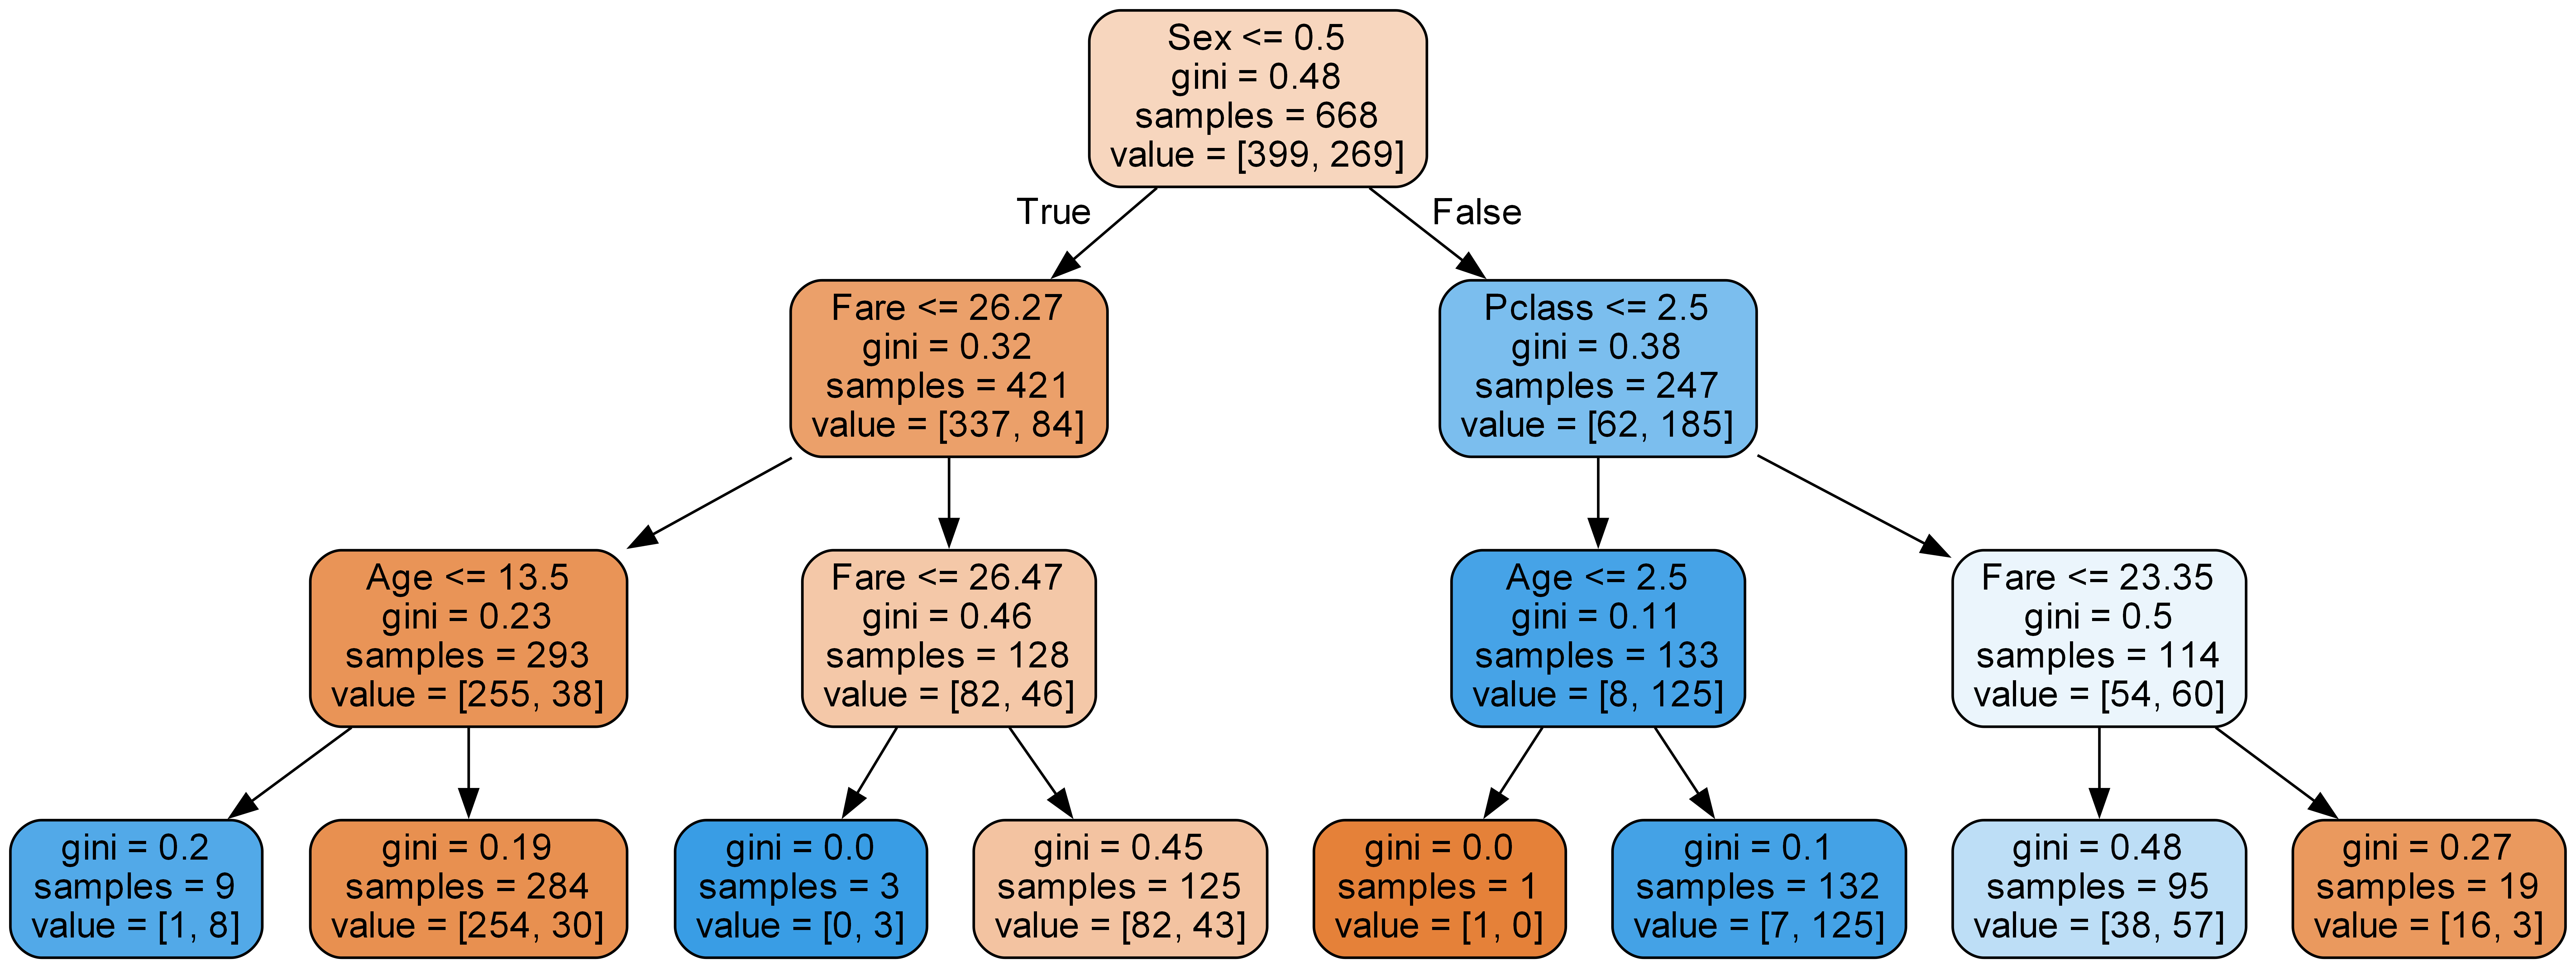

In [19]:
graphviz_installed = True

if (graphviz_installed):
    export_graphviz(pruned_val, out_file='best_pruned_tree_Titanic.dot', feature_names = ['Pclass','Sex', 'Age', 'Fare'],
                    rounded = True, proportion = False, precision = 2, filled = True)
  
    # Convert to png using system command
    call(['dot', '-Tpng', 'best_pruned_tree_Titanic.dot', '-o', 'best_pruned_tree_Titanic.png', '-Gdpi=600'])
        
else: 
    fig = plt.figure()
    tree.plot_tree(pruned_val,feature_names = ['Pclass','Sex', 'Age', 'Fare'], 
                         rounded = True, proportion = False, precision = 2, filled = True) #display tree
    fig.savefig('best_pruned_tree_Titanic.png')
  
Image(filename = 'best_pruned_tree_Titanic.png', width=1000) #uncomment if using graphviz

In [20]:
final_accuracy_score_test = pruned_val.score(X_test, y_test)
final_accuracy_score_test

0.8777777777777778

Based on an optimul maxdepth values of 3, the accuracy of the final model is 87.7% which is greater than the maximum accuracy score of 84% achieved on the development set at a maxdepth of 3. 

## Ensemble Methods
### Bagging

In [21]:
base = DecisionTreeClassifier(max_depth=3)
ensemble = BaggingClassifier(estimator=base, n_estimators=100, random_state=r)

base.fit(X_train, y_train.ravel())
ensemble.fit(X_train, y_train.ravel()) 

print("Accuracy base on development set:", base.score(X_val, y_val))
print("Accuracy base on test set:", base.score(X_test, y_test))

print("Accuracy ensemble on development set:", ensemble.score(X_val, y_val))
print("Accuracy ensemble on test set:", ensemble.score(X_test, y_test))

Accuracy base on development set: 0.8421052631578947
Accuracy base on test set: 0.8777777777777778
Accuracy ensemble on development set: 0.849624060150376
Accuracy ensemble on test set: 0.8444444444444444


There is a 0.89% increase in accuracy when using the bagging ensemble model on the development set.

There is a -3.79% decrease in accuracy when using the bagging ensemble model on the test set.

### Boosting -  AdaBoosting

In [22]:
#base = DecisionTreeClassifier(max_depth=3)
a_boost = AdaBoostClassifier(estimator=base, n_estimators=100, random_state=r)

base.fit(X_train, y_train)
a_boost.fit(X_train, y_train.ravel())

print("Accuracy base on development set:", base.score(X_val, y_val))
print("Accuracy base on test set:", base.score(X_test, y_test))

print("Accuracy boost on development set:", a_boost.score(X_val, y_val))
print("Accuracy boost on test set:", a_boost.score(X_test, y_test))

Accuracy base on development set: 0.8421052631578947
Accuracy base on test set: 0.8777777777777778
Accuracy boost on development set: 0.8120300751879699
Accuracy boost on test set: 0.8333333333333334


There is a -3.57% decrease in the accuracy score when the AdaBoosting method is applied to the development set.

There is a -5% decrease in the accuracy score when the AdaBoosting method is applied to the test set.

### Bootstrapping - Random Forest 

In [23]:
forest = RandomForestClassifier(n_estimators=100, random_state=r, max_depth=3)
forest.fit(X_train, y_train.ravel())

feature_imp = pd.Series(forest.feature_importances_).sort_values(ascending=False)
feature_imp

1    0.583438
3    0.180099
0    0.158739
2    0.077724
dtype: float64

From the feature importance results it can be seen that a passengers 'Sex' accounts for 58% on whether a passenger survived the Titanic or not. Which corroberates previous analysis done on the dataset in which Females where more likely to survive the Titanic. 

A passengers 'Pclass' and 'Fare' price are close in importance in determine whether a passenger survived the Titanic. Thus, passengers of a higher class and therefore paid a higher price for their tickets appeared to have a greater chance of survival. Furthermore, a passengers 'Age' contributes the least to determining whether a passenger surived which is inline with previous analysis as even for male children the older they got the less likely they were survive also. 

In [24]:
print("Accuracy base on development set:", base.score(X_val, y_val))
print("Accuracy base on test set:", base.score(X_test, y_test))

print("Accuracy random forest on development set:", forest.score(X_val, y_val))
print("Accuracy random forest on test set:", forest.score(X_test, y_test))

Accuracy base on development set: 0.8421052631578947
Accuracy base on test set: 0.8777777777777778
Accuracy random forest on development set: 0.8421052631578947
Accuracy random forest on test set: 0.8555555555555555


The performace of the model is the same when the Random Forest model is applied to the developemnt set.

There is an -2.5% decrease in accuracy when the random foreset ensemble model is applied to the test set.

In [25]:
X = titanic.iloc[:,[2,4,9]]

In [26]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.25, random_state=r)
# Training = 75%, Development = 15%, Testing = 10%
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_test2, y_test2, test_size=0.4, random_state=r)

print ("Training data:", X_train2.shape, y_train2.shape)
print ('Development data:', X_val2.shape, y_val2.shape)
print ("Test data:", X_test2.shape, y_test2.shape)

Training data: (668, 3) (668, 1)
Development data: (133, 3) (133, 1)
Test data: (90, 3) (90, 1)


In [27]:
forest = RandomForestClassifier(n_estimators=100, random_state=r)
forest.fit(X_train2, y_train2.ravel())

feature_imp = pd.Series(forest.feature_importances_).sort_values(ascending=False)
feature_imp

2    0.560596
1    0.328331
0    0.111073
dtype: float64

In [28]:
print("Accuracy random forest on development set:", forest.score(X_val2, y_val2))
print("Accuracy random forest on test set:", forest.score(X_test2, y_test2))

Accuracy random forest on development set: 0.849624060150376
Accuracy random forest on test set: 0.8111111111111111


Although the models accuracy on the development set improve slitghly through the reduction in features, there was a greater decrease in accuracy when the model was applied on the testing set. Thus, the Random Forest model will be applied to the testing set with all four features.

## Best Ensemble Model

The best model appears to be Random Forest as the model was able to achieve the highest accuracy score in comparison to both the Bagging and Ada Boosting models. Thus, Random Forest will be the selected model to predict whether a passenger surivived the Titanic using all four features.

### Random Forest Tuning

In [29]:
def rf_tuning_classifier(X_train, y_train, X_test, y_test, n_est, m_d):
    
    rf_tuning = RandomForestClassifier(n_estimators=n_est, max_depth=m_d, random_state=4)
    rf_tuning.fit(X_train, y_train.ravel())
    
    accuracy_score = rf_tuning.score(X_test, y_test)
    print("Accuracy Score on the Test Set of Base vs RandomForest:")
    return base.score(X_test, y_test), accuracy_score

In [30]:
rf_tuning_classifier(X_train, y_train, X_test, y_test, 100, 3)

Accuracy Score on the Test Set of Base vs RandomForest:


(0.8777777777777778, 0.8555555555555555)

In [31]:
rf_tuning_classifier(X_train, y_train, X_test, y_test, 50, 3)

Accuracy Score on the Test Set of Base vs RandomForest:


(0.8777777777777778, 0.8222222222222222)

In [32]:
rf_tuning_classifier(X_train, y_train, X_test, y_test, 25, 3)

Accuracy Score on the Test Set of Base vs RandomForest:


(0.8777777777777778, 0.8444444444444444)

In [33]:
rf_tuning_classifier(X_train, y_train, X_test, y_test, 25, 7)

Accuracy Score on the Test Set of Base vs RandomForest:


(0.8777777777777778, 0.9)

In [34]:
rf_tuning_classifier(X_train, y_train, X_test, y_test, 25, 9)

Accuracy Score on the Test Set of Base vs RandomForest:


(0.8777777777777778, 0.8888888888888888)

In [35]:
rf_tuning_classifier(X_train, y_train, X_test, y_test, 25, 10)

Accuracy Score on the Test Set of Base vs RandomForest:


(0.8777777777777778, 0.8777777777777778)

In [36]:
rf_tuning_classifier(X_train, y_train, X_test, y_test, 25, 12)

Accuracy Score on the Test Set of Base vs RandomForest:


(0.8777777777777778, 0.8555555555555555)

In [37]:
rf_tuning_classifier(X_train, y_train, X_test, y_test, 25, 13)

Accuracy Score on the Test Set of Base vs RandomForest:


(0.8777777777777778, 0.8777777777777778)

In [38]:
forest = RandomForestClassifier(n_estimators=100, random_state=r, max_depth=3)
forest.fit(X_train, y_train.ravel())

print("Accuracy random forest on development set:", forest.score(X_val, y_val))
print("Accuracy random forest on test set:", forest.score(X_test, y_test))

Accuracy random forest on development set: 0.8421052631578947
Accuracy random forest on test set: 0.8555555555555555


## Conclusion

Based on the above tuning models using Random Forest with various n_estimators and max_depth parameters the best performing model occurs when the n_estimators = 25 and the max_depth = 7 achieving an accuracy of 90% on the test set.